# D8 - Building fires in Estonia
## Karolin Kivilaan, Kati Ilus, Geitrud Pank

In [1]:
import numpy as np
import pandas as pd
import apyori
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import ipyleaflet
from ipyleaflet import Map, Marker, Popup, MarkerCluster
from ipywidgets import HTML
import geocoder


data_df = pd.read_csv("hoonetulekahjud.csv")
data = data_df.values
data_with_months = []
data_copy = data.copy()
for i in data_copy:
    if i[4] == 1:
        i[4] = 'January'
    elif i[4] == 2:
        i[4] = 'February'
    elif i[4] == 3:
        i[4] = 'March'
    elif i[4] == 4:
        i[4] = 'April'
    elif i[4] == 5:
        i[4] = 'May'
    elif i[4] == 6:
        i[4] = 'June'
    elif i[4] == 7:
        i[4] = 'July'
    elif i[4] == 8:
        i[4] = 'August'
    elif i[4] == 9:
        i[4] = 'September'
    elif i[4] == 10:
        i[4] = 'October'
    elif i[4] == 11:
        i[4] = 'November'
    elif i[4] == 12:
        i[4] = 'December'
    data_with_months.append(i)
data_df

,Maakond,Aasta,Hoone liik,Tekkepõhjus,Kuu,Hoonetulekahjud
0,Valga maakond,2014,Mitteeluhooned,!Sisestamata!,3,1
1,Tartu maakond,2014,Mitteeluhooned,!Sisestamata!,3,3
2,Rapla maakond,2014,Mitteeluhooned,!Sisestamata!,3,1
3,Lääne maakond,2014,Mitteeluhooned,!Sisestamata!,3,1
4,Harju maakond,2014,Mitteeluhooned,!Sisestamata!,3,2
...,...,...,...,...,...,...
5660,Ida-Viru maakond,2020,!Sisestamata!,!Sisestamata!,11,1
5661,Ida-Viru maakond,2020,Eluhooned,Lahtise tule kasutamisel,11,1
5662,Harju maakond,2020,!Sisestamata!,!Sisestamata!,11,1
5663,Harju maakond,2020,Eluhooned,!Sisestamata!,11,1


In [2]:
estonia_coord = geocoder.osm('Estonia')
coord = [estonia_coord.lat, estonia_coord.lng]
est_map = Map(center=coord, zoom=6.7)
est_map_2014 = Map(center=coord, zoom=6.7)
est_map_2015 = Map(center=coord, zoom=6.7)
est_map_2016 = Map(center=coord, zoom=6.7)
est_map_2017 = Map(center=coord, zoom=6.7)
est_map_2018 = Map(center=coord, zoom=6.7)
est_map_2019 = Map(center=coord, zoom=6.7)
est_map_2020 = Map(center=coord, zoom=6.7)

est_map

Map(center=[58.7523778, 25.3319078], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

### Basic plotting

In [3]:
year2014 = []
year2015 = []
year2016 = []
year2017 = []
year2018 = []
year2019 = []
year2020 = []
year2014_month = []
year2015_month = []
year2016_month = []
year2017_month = []
year2018_month = []
year2019_month = []
year2020_month = []
for i in range(len(data)):
    if data[i][1] == 2014:
        year2014.append(data[i])
        year2014_month.append(data_with_months[i])
    elif data[i][1] == 2015:
        year2015.append(data[i])
        year2015_month.append(data_with_months[i])
    elif data[i][1] == 2016:
        year2016.append(data[i])
        year2016_month.append(data_with_months[i])
    elif data[i][1] == 2017:
        year2017.append(data[i])
        year2017_month.append(data_with_months[i])
    elif data[i][1] == 2018:
        year2018.append(data[i])
        year2018_month.append(data_with_months[i])
    elif data[i][1] == 2019:
        year2019.append(data[i])
        year2019_month.append(data_with_months[i])
    elif data[i][1] == 2020:
        year2020.append(data[i])
        year2020_month.append(data_with_months[i])
#print(year2014)
data_by_years = [year2014, year2015, year2016, year2017, year2018, year2019, year2020]

In [4]:
def fires_in_a_year(year):
    counter = 0
    for i in year:
        counter += int(i[5])
    return counter
print(fires_in_a_year(year2016))

1401


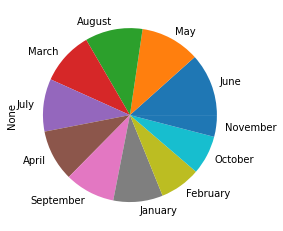

In [5]:
def fires_by_month(year):
    array = []
    for i in year:
        for j in range(i[5]):
            array.append(i[4])
    return array
o = pd.Index(fires_by_month(year2020_month))
o.value_counts().plot(kind='pie')
plt.show()

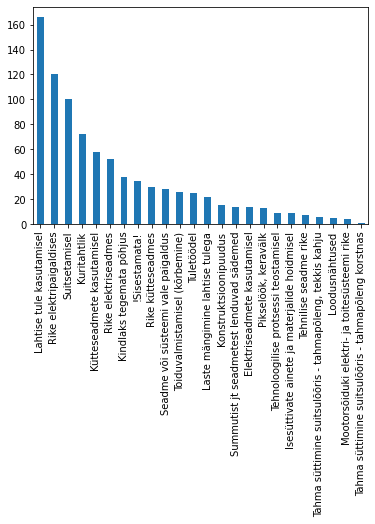

In [6]:
def different_causes(year):
    array = []
    for i in year:
        for j in range(i[5]):
            array.append(i[3])
    return array
o = pd.Index(different_causes(year2020))
o.value_counts().plot(kind='bar')
plt.show()

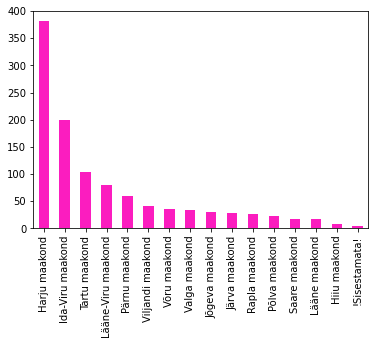

In [7]:
def fires_by_county(year):
    array = []
    for i in year:
        for j in range(i[5]):
            array.append(i[0])
    return array
y2019 = pd.Index(fires_by_county(year2019))
y2019.value_counts().plot(kind='bar', color='#fb1dbf')
plt.show()

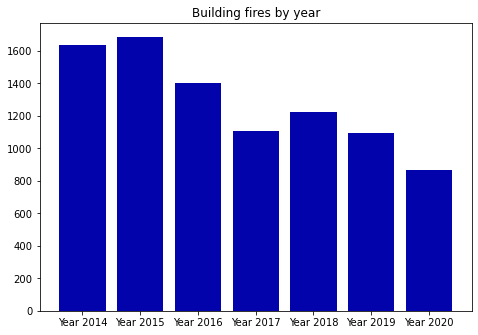

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Year 2014', 'Year 2015', 'Year 2016', 'Year 2017', 'Year 2018', 'Year 2019', 'Year 2020']
counts = [fires_in_a_year(year2014), fires_in_a_year(year2015), fires_in_a_year(year2016), fires_in_a_year(year2017), fires_in_a_year(year2018), fires_in_a_year(year2019), fires_in_a_year(year2020)] 
ax.bar(langs,counts, color='#0203aa')
ax.set_title('Building fires by year')
plt.show()

In [9]:
#Maakonnad ja arvud 2019 aastal
year = y2019.value_counts().index.tolist()
count = []
for i in year:
    count.append([i, y2019.value_counts().loc[i]])
county_counter = pd.DataFrame(count)
county_counter

,0,1
0,Harju maakond,381
1,Ida-Viru maakond,200
2,Tartu maakond,104
3,Lääne-Viru maakond,79
4,Pärnu maakond,60
5,Viljandi maakond,41
6,Võru maakond,36
7,Valga maakond,34
8,Jõgeva maakond,31
9,Järva maakond,28


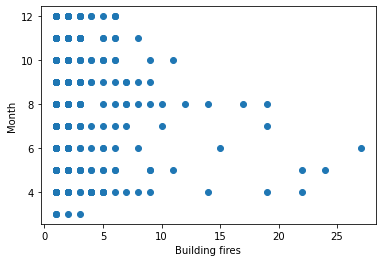

In [10]:
#Clustering fires by month
k = data_df.loc[data_df['Aasta'] == 2014]
plt.scatter(k['Hoonetulekahjud'], k['Kuu'])
plt.xlabel('Building fires')
plt.ylabel('Month')
plt.show()

In [11]:
counties = ['Valga maakond', 'Tartu maakond', 'Rapla maakond', 'Lääne maakond',
       'Harju maakond', 'Võru maakond', 'Viljandi maakond',
       'Saare maakond', 'Pärnu maakond', 'Põlva maakond',
       'Lääne-Viru maakond', 'Järva maakond', 'Jõgeva maakond',
       'Ida-Viru maakond', 'Hiiu maakond']

def map_counties(county, mapmap):
    location = geocoder.osm(county)
    coordinates = [location.lat, location.lng]
    marker = Marker(location=coordinates, title=county)
    mapmap.add_layer(marker)

#for i in range(len(counties)):
    #map_counties(counties[i], est_map)
    
#est_map

In [12]:
def create_markers(coordinates, nr):
    lst = []
    for i in range(nr):
        marker = Marker(location=coordinates)
        lst.append(marker)
    return lst

In [13]:
#Maakonnad ja arvud 2014 aastal
y2014 = pd.Index(fires_by_county(year2014))
year = y2014.value_counts().index.tolist()
count = []
for i in year:
    count.append([i, y2014.value_counts().loc[i]])
county_counter = pd.DataFrame(count, columns = ['Maakond', 'Arv'])

for row in county_counter.itertuples(index=True):
    rida = getattr(row, 'Maakond')
    nr = getattr(row, 'Arv')
    
    if rida == '!Sisestamata!':
        rida = 'Liivi laht'
        
    location = geocoder.osm(rida)
    coordinates = [location.lat, location.lng]
    
    lst = create_markers(coordinates, nr)
    cluster = MarkerCluster(
        markers = lst
    )
    est_map_2014.add_layer(cluster)

est_map_2014

Map(center=[58.7523778, 25.3319078], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

In [14]:
#Maakonnad ja arvud 2015 aastal
y2015 = pd.Index(fires_by_county(year2015))
year = y2015.value_counts().index.tolist()
count = []
for i in year:
    count.append([i, y2015.value_counts().loc[i]])
county_counter = pd.DataFrame(count, columns = ['Maakond', 'Arv'])

for row in county_counter.itertuples(index=True):
    rida = getattr(row, 'Maakond')
    nr = getattr(row, 'Arv')
    
    if rida == '!Sisestamata!':
        rida = 'Liivi laht'
    
    location = geocoder.osm(rida)
    coordinates = [location.lat, location.lng]
    
    lst = create_markers(coordinates, nr)
    cluster = MarkerCluster(
        markers = lst
    )
    est_map_2015.add_layer(cluster)

est_map_2015

Map(center=[58.7523778, 25.3319078], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

In [15]:
#Maakonnad ja arvud 2016 aastal
y2016 = pd.Index(fires_by_county(year2016))
year = y2016.value_counts().index.tolist()
count = []
for i in year:
    count.append([i, y2016.value_counts().loc[i]])
county_counter = pd.DataFrame(count, columns = ['Maakond', 'Arv'])

for row in county_counter.itertuples(index=True):
    rida = getattr(row, 'Maakond')
    nr = getattr(row, 'Arv')
    
    if rida == '!Sisestamata!':
        rida = 'Liivi laht'
    
    location = geocoder.osm(rida)
    coordinates = [location.lat, location.lng]
    
    lst = create_markers(coordinates, nr)
    cluster = MarkerCluster(
        markers = lst
    )
    est_map_2016.add_layer(cluster)

est_map_2016

Map(center=[58.7523778, 25.3319078], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

In [16]:
#Maakonnad ja arvud 2017 aastal
y2017 = pd.Index(fires_by_county(year2017))
year = y2017.value_counts().index.tolist()
count = []
for i in year:
    count.append([i, y2017.value_counts().loc[i]])
county_counter = pd.DataFrame(count, columns = ['Maakond', 'Arv'])

for row in county_counter.itertuples(index=True):
    rida = getattr(row, 'Maakond')
    nr = getattr(row, 'Arv')
    
    if rida == '!Sisestamata!':
        rida = 'Liivi laht'
    
    location = geocoder.osm(rida)
    coordinates = [location.lat, location.lng]
    
    lst = create_markers(coordinates, nr)
    cluster = MarkerCluster(
        markers = lst
    )
    est_map_2017.add_layer(cluster)

est_map_2017

Map(center=[58.7523778, 25.3319078], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

In [17]:
#Maakonnad ja arvud 2018 aastal
y2018 = pd.Index(fires_by_county(year2018))
year = y2018.value_counts().index.tolist()
count = []
for i in year:
    count.append([i, y2018.value_counts().loc[i]])
county_counter = pd.DataFrame(count, columns = ['Maakond', 'Arv'])

for row in county_counter.itertuples(index=True):
    rida = getattr(row, 'Maakond')
    nr = getattr(row, 'Arv')
    
    if rida == '!Sisestamata!':
        rida = 'Liivi laht'
    
    location = geocoder.osm(rida)
    coordinates = [location.lat, location.lng]
    
    lst = create_markers(coordinates, nr)
    cluster = MarkerCluster(
        markers = lst
    )
    est_map_2018.add_layer(cluster)

est_map_2018

Map(center=[58.7523778, 25.3319078], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

In [18]:
#Maakonnad ja arvud 2019 aastal
y2019 = pd.Index(fires_by_county(year2019))
year = y2019.value_counts().index.tolist()
count = []
for i in year:
    count.append([i, y2019.value_counts().loc[i]])
county_counter = pd.DataFrame(count, columns = ['Maakond', 'Arv'])

for row in county_counter.itertuples(index=True):
    rida = getattr(row, 'Maakond')
    nr = getattr(row, 'Arv')
    
    if rida == '!Sisestamata!':
        rida = 'Liivi laht'
    
    location = geocoder.osm(rida)
    coordinates = [location.lat, location.lng]
    
    lst = create_markers(coordinates, nr)
    cluster = MarkerCluster(
        markers = lst
    )
    est_map_2019.add_layer(cluster)

est_map_2019

Map(center=[58.7523778, 25.3319078], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

In [19]:
#Maakonnad ja arvud 2020 aastal
y2020 = pd.Index(fires_by_county(year2020))
year = y2020.value_counts().index.tolist()
count = []
for i in year:
    count.append([i, y2020.value_counts().loc[i]])
county_counter = pd.DataFrame(count, columns = ['Maakond', 'Arv'])

for row in county_counter.itertuples(index=True):
    rida = getattr(row, 'Maakond')
    nr = getattr(row, 'Arv')
    
    if rida == '!Sisestamata!':
        rida = 'Liivi laht'
    
    location = geocoder.osm(rida)
    coordinates = [location.lat, location.lng]
    
    lst = create_markers(coordinates, nr)
    cluster = MarkerCluster(
        markers = lst
    )
    est_map_2020.add_layer(cluster)

est_map_2020

Map(center=[58.7523778, 25.3319078], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…